In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [147]:
df.date.dtypes

dtype('O')

In [148]:
df.value.dtypes

dtype('int64')

In [149]:
df.date = pd.to_datetime(df.date)

## Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [150]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

## Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Page Views', ylabel='Date'>

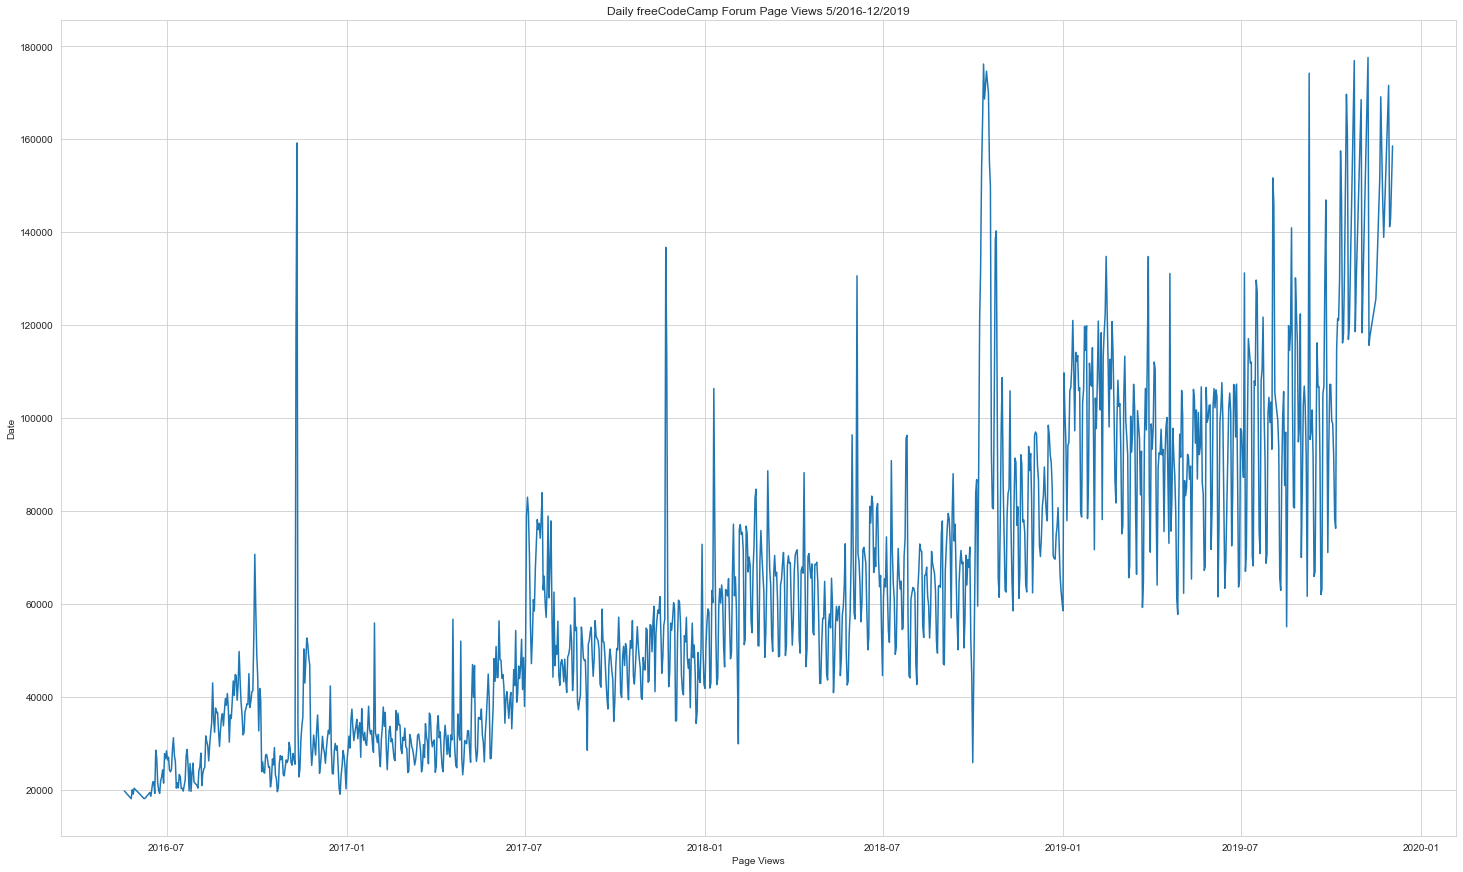

In [151]:
plt.figure(figsize=(25,15))
fig = sns.lineplot(df.date,df.value)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Page Views')
plt.ylabel('Date')
fig.

## Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [129]:
df['year'] = df.date.dt.year
df['month'] = df['date'].dt.month_name()
df['month_n'] = df['date'].dt.month
df

,date,value,year,month,month_n
10,2016-05-19,19736,2016,May,5
17,2016-05-26,18060,2016,May,5
18,2016-05-27,19997,2016,May,5
19,2016-05-28,19044,2016,May,5
20,2016-05-29,20325,2016,May,5
...,...,...,...,...,...
1294,2019-11-24,138875,2019,November,11
1299,2019-11-29,171584,2019,November,11
1300,2019-11-30,141161,2019,November,11
1301,2019-12-01,142918,2019,December,12


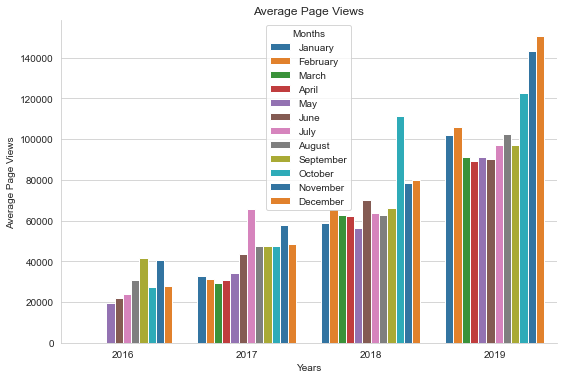

In [139]:
g = sns.catplot(x = 'year', y = 'value', data = df, kind = 'bar',
                hue = 'month', aspect = 1.55, ci = None, 
                hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], legend_out = False, palette = 'tab10').set() 
plt.title('Average Page Views')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title = 'Months')

# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

Text(0, 0.5, 'Page Views')

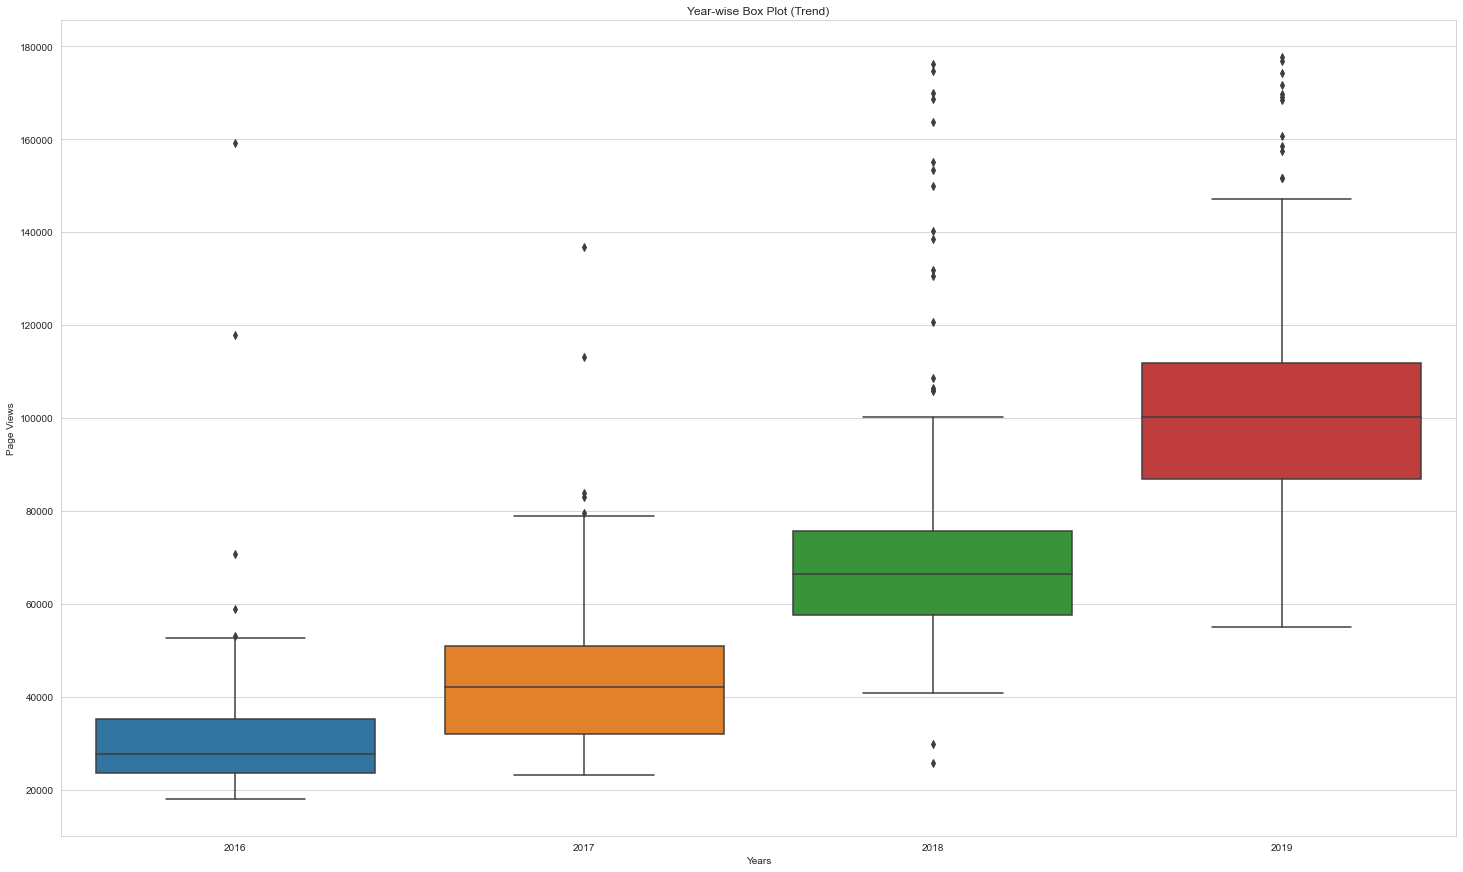

In [141]:
plt.figure(figsize=(25,15))

sns.boxplot(df.year , df.value)
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Years')
plt.ylabel('Page Views')

Text(0, 0.5, 'Page Views')

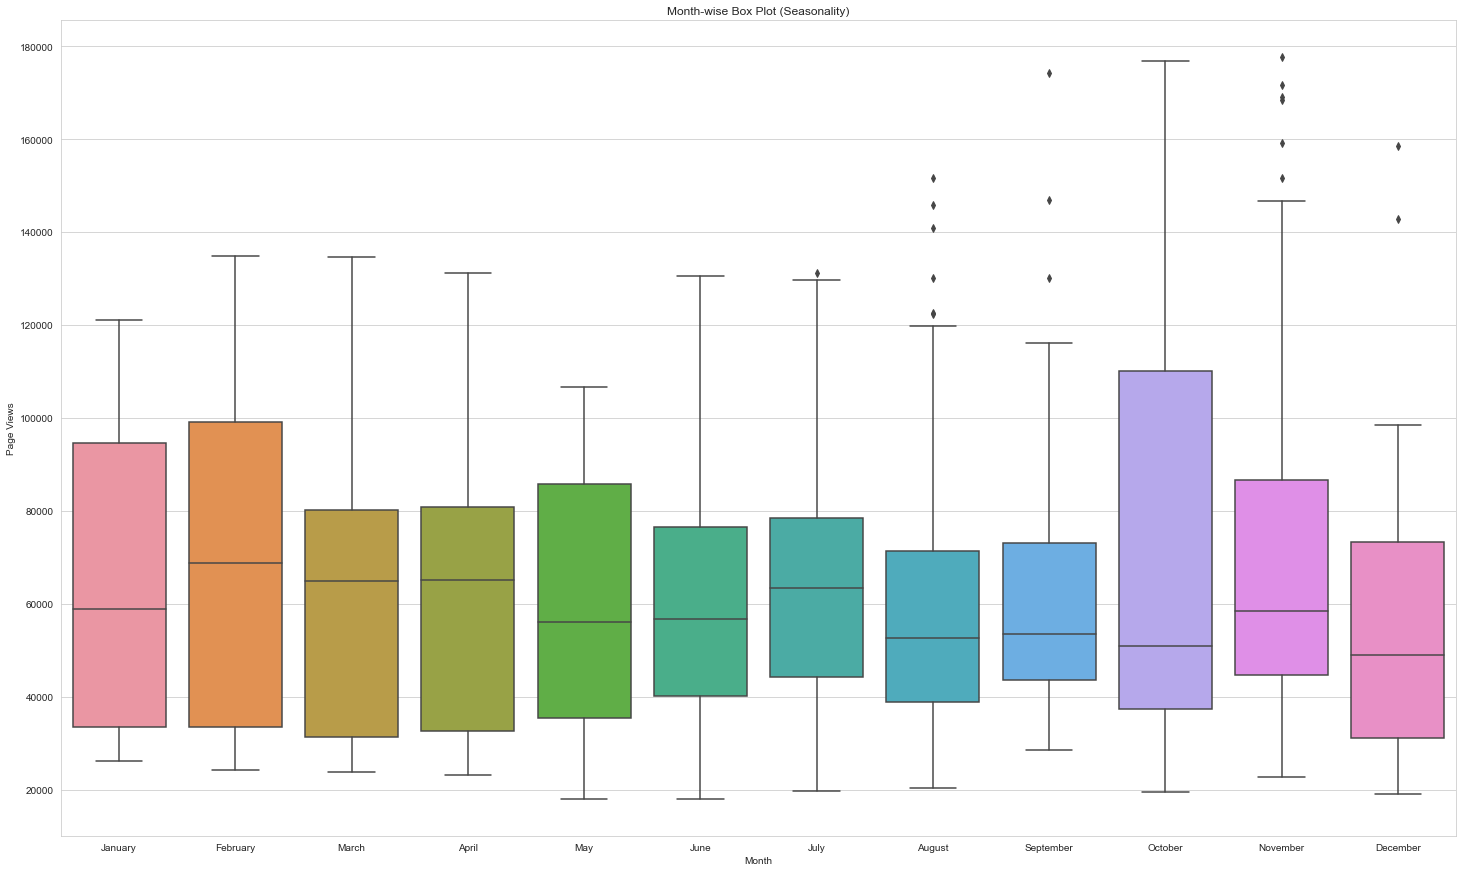

In [142]:
plt.figure(figsize=(25,15))
sns.boxplot(df.month , df.value ,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df.date = pd.to_datetime(df.date)
# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig = sns.lineplot(df.date,df.value)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Page Views')
    plt.ylabel('Date')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['year'] = df.date.dt.year
    df['month'] = df['date'].dt.month_name()
    df['month_n'] = df['date'].dt.month
    df

    # Draw bar plot
    g = sns.catplot(x = 'year', y = 'value', data = df, kind = 'bar',
                hue = 'month', aspect = 1.55, ci = None, 
                hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], legend_out = False, palette = 'tab10').set() 
    plt.title('Average Page Views')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title = 'Months')
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    sns.boxplot(df.year , df.value)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Years')
    plt.ylabel('Page Views')


    sns.boxplot(df.month , df.value ,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
